# Chapter 8: Quantum Production System
### Qiskit 1.0 (0.46)

A simple pure production systems for sorting of a string. 


In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution 
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import MCXGate

The initial state: $cdcab= | 10 11 10 00 01 \rangle $

In [2]:
qc = QuantumCircuit(10)


#State Preparation 0-9
#Working Memory for Flag bit 10
#1St Path descriptor 11-12

#Initial state b,a,c,d,c 

#First Position 01 is b 01
qc.x(0)
#Second Position 23 is a 00

#Third Position 45 is c 10
qc.x(5)

#Fourth Position 67 is d 11
qc.x(6)
qc.x(7)

#Fifth Position 89 is c 10
qc.x(9)

The working memory $W$ is represented in the quantum circuit by teen qubits $0$ to $9$. The qubit $10$ is used as an internal flag to mark the execution of the rule in relation to the path descriptor. The marking of the flag is implemented by the Toffoli gate, also called the ccX gate, it recognizes 
 the corresponding index represented by the path descriptor.   Since we are searching for the depth two we are required two path descriptors represented by the qubits $11$ to $14$, since each index has four values.  The path descriptor is indexes are indicated  by the NOT gates. 
To implement the oracle that marks the solution we will use the  $MCXGate$, a  multi-controlled X (Toffoli) gate. 
The auxiliary qubit $14$ indicates by one the presence of a solution $ | 11 10 10 01 00  \rangle $ by the oracle function.

In [3]:
qc = QuantumCircuit(16)


#State Preparation 0-9
#Working Memory for Flag bit 10
#1St Path descriptor 11-12
#1th Path descriptor 13-14

#Initial state b,a,c,d,c 

#First Position 01 is b 01
qc.x(0)
#Second Position 23 is a 00

#Third Position 45 is c 10
qc.x(5)

#Fourth Position 67 is d 11
qc.x(6)
qc.x(7)

#Fifth Position 89 is c 10
qc.x(9)


#Path Descriptor
qc.h(11)
qc.h(12)

qc.barrier()

#First Rule
#Set flag 10 dependent on the path descriptor
qc.ccx(11,12,10)
# Move
qc.cswap(10,0,2)
qc.cswap(10,1,3)
#Reset flag
qc.ccx(11,12,10) 

#Second Rule
#Set flag 10 dependent on the path descriptor
qc.x(11)
qc.ccx(11,12,10)
# Move
qc.cswap(10,2,4)
qc.cswap(10,3,5)
#Reset flag
qc.ccx(11,12,10) 
qc.x(11)

#Third Rule
#Set flag 10 dependent on the path descriptor
qc.x(12)
qc.ccx(11,12,10)
# Move
qc.cswap(10,4,6)
qc.cswap(10,5,7)
#Reset flag
qc.ccx(11,12,10) 
qc.x(12)

#Fourth Rule
#Set flag 10 dependent on the path descriptor
qc.x(11)
qc.x(12)
qc.ccx(11,12,10)
# Move
qc.cswap(10,6,8)
qc.cswap(10,7,9)
#Reset flag
qc.ccx(11,12,10) 
qc.x(12)
qc.x(11)

qc.barrier()

#2th Path Descriptor
qc.h(13)
qc.h(14)

qc.barrier()

#First Rule
#Set flag 10 dependent on the path descriptor
qc.ccx(13,14,10)
# Move
qc.cswap(10,0,2)
qc.cswap(10,1,3)
#Reset flag
qc.ccx(13,14,10) 

#Second Rule
#Set flag 10 dependent on the path descriptor
qc.x(13)
qc.ccx(13,14,10)
# Move
qc.cswap(10,2,4)
qc.cswap(10,3,5)
#Reset flag
qc.ccx(13,14,10) 
qc.x(13)

#Third Rule
#Set flag 10 dependent on the path descriptor
qc.x(14)
qc.ccx(13,14,10)
# Move
qc.cswap(10,4,6)
qc.cswap(10,5,7)
#Reset flag
qc.ccx(13,14,10) 
qc.x(14)

#Fourth Rule
#Set flag 10 dependent on the path descriptor
qc.x(13)
qc.x(14)
qc.ccx(13,14,10)
# Move
qc.cswap(10,6,8)
qc.cswap(10,7,9)
#Reset flag
qc.ccx(13,14,10) 
qc.x(14)
qc.x(13)

qc.barrier()

#Oracle

gate = MCXGate(5)
#Mark the goal state
#Initial state a,b,c,c,d
qc.append(gate, [2,5,7,8,9,15])  

qc.draw(fold=220)

┌───┐ ░                                                                                           ░       ░                                                                                           ░      
 q_0: ┤ X ├─░───────X───────────────────────────────────────────────────────────────────────────────────░───────░───────X───────────────────────────────────────────────────────────────────────────────────░──────
      └───┘ ░       │                                                                                   ░       ░       │                                                                                   ░      
 q_1: ──────░───────┼──X────────────────────────────────────────────────────────────────────────────────░───────░───────┼──X────────────────────────────────────────────────────────────────────────────────░──────
            ░       │  │                                                                                ░       ░       │  │                                                                                ░      
 q_2: ──────░───────X──┼─────────────────X──────────────────────────────────────────────────────────────░───────░───────X──┼─────────────────X──────────────────────────────────────────────────────────────░───■──
            ░       │  │                 │                                                              ░       ░       │  │                 │                                                              ░   │  
 q_3: ──────░───────┼──X─────────────────┼──X───────────────────────────────────────────────────────────░───────░───────┼──X─────────────────┼──X───────────────────────────────────────────────────────────░───┼──
            ░       │  │                 │  │                                                           ░       ░       │  │                 │  │                                                           ░   │  
 q_4: ──────░───────┼──┼─────────────────X──┼─────────────────X─────────────────────────────────────────░───────░───────┼──┼─────────────────X──┼─────────────────X─────────────────────────────────────────░───┼──
      ┌───┐ ░       │  │                 │  │                 │                                         ░       ░       │  │                 │  │                 │                                         ░   │  
 q_5: ┤ X ├─░───────┼──┼─────────────────┼──X─────────────────┼──X──────────────────────────────────────░───────░───────┼──┼─────────────────┼──X─────────────────┼──X──────────────────────────────────────░───■──
      ├───┤ ░       │  │                 │  │                 │  │                                      ░       ░       │  │                 │  │                 │  │                                      ░   │  
 q_6: ┤ X ├─░───────┼──┼─────────────────┼──┼─────────────────X──┼──────────────────────X───────────────░───────░───────┼──┼─────────────────┼──┼─────────────────X──┼──────────────────────X───────────────░───┼──
      ├───┤ ░       │  │                 │  │                 │  │                      │               ░       ░       │  │                 │  │                 │  │                      │               ░   │  
 q_7: ┤ X ├─░───────┼──┼─────────────────┼──┼─────────────────┼──X──────────────────────┼──X────────────░───────░───────┼──┼─────────────────┼──┼─────────────────┼──X──────────────────────┼──X────────────░───■──
      └───┘ ░       │  │                 │  │                 │  │                      │  │            ░       ░       │  │                 │  │                 │  │                      │  │            ░   │  
 q_8: ──────░───────┼──┼─────────────────┼──┼─────────────────┼──┼──────────────────────X──┼────────────░───────░───────┼──┼─────────────────┼──┼─────────────────┼──┼──────────────────────X──┼────────────░───■──
      ┌───┐ ░       │  │                 │  │                 │  │                      │  │            ░       ░       │  │                 │  │                 │  │                      │ 

We will use the \textit{qiskit} $def$ function to reduce the complexity of the quantum circuit.
Using the  $def$ function we define the circuit that represents the four rules.

In [4]:
def rules():
    qc = QuantumCircuit(15)
    #First Rule
    #Set flag 10 dependent on the path descriptor
    qc.ccx(11,12,10)
    # Move
    qc.cswap(10,0,2)
    qc.cswap(10,1,3)
    #Reset flag
    qc.ccx(11,12,10) 

    #Second Rule
    #Set flag 10 dependent on the path descriptor
    qc.x(11)
    qc.ccx(11,12,10)
    # Move
    qc.cswap(10,2,4)
    qc.cswap(10,3,5)
    #Reset flag
    qc.ccx(11,12,10) 
    qc.x(11)

    #Third Rule
    #Set flag 10 dependent on the path descriptor
    qc.x(12)
    qc.ccx(11,12,10)
    # Move
    qc.cswap(10,4,6)
    qc.cswap(10,5,7)
    #Reset flag
    qc.ccx(11,12,10) 
    qc.x(12)

    #Fourth Rule
    #Set flag 10 dependent on the path descriptor
    qc.x(11)
    qc.x(12)
    qc.ccx(11,12,10)
    # Move
    qc.cswap(10,6,8)
    qc.cswap(10,7,9)
    #Reset flag
    qc.ccx(11,12,10) 
    qc.x(12)
    qc.x(11)

    

    #First Rule
    #Set flag 10 dependent on the path descriptor
    qc.ccx(13,14,10)
    # Move
    qc.cswap(10,0,2)
    qc.cswap(10,1,3)
    #Reset flag
    qc.ccx(13,14,10) 

    #Second Rule
    #Set flag 10 dependent on the path descriptor
    qc.x(13)
    qc.ccx(13,14,10)
    # Move
    qc.cswap(10,2,4)
    qc.cswap(10,3,5)
    #Reset flag
    qc.ccx(13,14,10) 
    qc.x(13)

    #Third Rule
    #Set flag 10 dependent on the path descriptor
    qc.x(14)
    qc.ccx(13,14,10)
    # Move
    qc.cswap(10,4,6)
    qc.cswap(10,5,7)
    #Reset flag
    qc.ccx(13,14,10) 
    qc.x(14)

    #Fourth Rule
    #Set flag 10 dependent on the path descriptor
    qc.x(13)
    qc.x(14)
    qc.ccx(13,14,10)
    # Move
    qc.cswap(10,6,8)
    qc.cswap(10,7,9)
    #Reset flag
    qc.ccx(13,14,10) 
    qc.x(14)
    qc.x(13)

    qc.name="RULES"
    return qc

In quantum computation it is not possible to reset the information  to the pattern representing the initial state. Instead we  un-compute the output back to the input before applying the amplification step of the Grover's algorithm. We use the $qiskit$ inverse command $inverse()$ to define the inverse operation by a function.

In [5]:
def rules_inv():
    qc=rules()
    qc_inv=qc.inverse()
    qc_inv.name="RULES†"
    return qc_inv

A search of depth two is described by a path descriptor of four qubits, 11, 12, 13, 14. The Grover amplification act on the qubits 13, 18 and 23 that describe the path descriptor resulting in sixteen states and we use the $qiskit$ $def$ function.   

In [6]:
def Grover():

    qc = QuantumCircuit(15)
    #Diffusor 11, 12, 13, 14 

    qc.h([11,12,13,14])
    qc.x([11,12,13,14])
    qc.h(11)
    gate = MCXGate(3)
    qc.append(gate, [12,13,14,11])
    qc.h(11)
    qc.x([11,12,13,14])
    qc.h([11,12,13,14])

    qc.name="G"
    return qc

We apply the Grover’s algorithm with two rotations

In [7]:
qc = QuantumCircuit(16,4)

#State Preparation 0-9
#Working Memory for Flag bit 10
#1St Path descriptor 11-12
#1th Path descriptor 13-14

#Initial state b,a,c,d,c 

#First Position 01 is b 01
qc.x(0)
#Second Position 23 is a 00

#Third Position 45 is c 10
qc.x(5)

#Fourth Position 67 is d 11
qc.x(6)
qc.x(7)

#Fifth Position 89 is c 10
qc.x(9)


#Path Descriptor
qc.h(11)
qc.h(12)
qc.h(13)
qc.h(14)

#Preparation of Aux
qc.x(15)
qc.h(15)

qc.append(rules(),range(15))
#Oracle
gate = MCXGate(5)
#Mark the goal state
#Initial state a,b,c,c,d
qc.append(gate, [2,5,7,8,9,15])  

qc.append(rules_inv(),range(15))
qc.barrier()
qc.h(15)
qc.barrier()
qc.append(Grover(),range(15))

qc.barrier()

qc.h(15)

qc.append(rules(),range(15))
#Oracle
gate = MCXGate(5)
#Mark the goal state
#Initial state a,b,c,c,d
qc.append(gate, [2,5,7,8,9,15])  

qc.append(rules_inv(),range(15))
qc.barrier()
qc.h(15)
qc.barrier()
qc.append(Grover(),range(15))

qc.measure(11,0)
qc.measure(12,1)
qc.measure(13,2)
qc.measure(14,3)

qc.draw(fold=220)

┌───┐┌─────────┐     ┌──────────┐ ░       ░ ┌─────┐ ░ ┌─────────┐     ┌──────────┐ ░       ░ ┌─────┐            
 q_0: ┤ X ├┤0        ├─────┤0         ├─░───────░─┤0    ├─░─┤0        ├─────┤0         ├─░───────░─┤0    ├────────────
      └───┘│         │     │          │ ░       ░ │     │ ░ │         │     │          │ ░       ░ │     │            
 q_1: ─────┤1        ├─────┤1         ├─░───────░─┤1    ├─░─┤1        ├─────┤1         ├─░───────░─┤1    ├────────────
           │         │     │          │ ░       ░ │     │ ░ │         │     │          │ ░       ░ │     │            
 q_2: ─────┤2        ├──■──┤2         ├─░───────░─┤2    ├─░─┤2        ├──■──┤2         ├─░───────░─┤2    ├────────────
           │         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
 q_3: ─────┤3        ├──┼──┤3         ├─░───────░─┤3    ├─░─┤3        ├──┼──┤3         ├─░───────░─┤3    ├────────────
           │         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
 q_4: ─────┤4        ├──┼──┤4         ├─░───────░─┤4    ├─░─┤4        ├──┼──┤4         ├─░───────░─┤4    ├────────────
      ┌───┐│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
 q_5: ┤ X ├┤5        ├──■──┤5         ├─░───────░─┤5    ├─░─┤5        ├──■──┤5         ├─░───────░─┤5    ├────────────
      ├───┤│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
 q_6: ┤ X ├┤6        ├──┼──┤6         ├─░───────░─┤6    ├─░─┤6        ├──┼──┤6         ├─░───────░─┤6    ├────────────
      ├───┤│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
 q_7: ┤ X ├┤7  RULES ├──■──┤7  RULES† ├─░───────░─┤7  G ├─░─┤7  RULES ├──■──┤7  RULES† ├─░───────░─┤7  G ├────────────
      └───┘│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
 q_8: ─────┤8        ├──■──┤8         ├─░───────░─┤8    ├─░─┤8        ├──■──┤8         ├─░───────░─┤8    ├────────────
      ┌───┐│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
 q_9: ┤ X ├┤9        ├──■──┤9         ├─░───────░─┤9    ├─░─┤9        ├──■──┤9         ├─░───────░─┤9    ├────────────
      └───┘│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │            
q_10: ─────┤10       ├──┼──┤10        ├─░───────░─┤10   ├─░─┤10       ├──┼──┤10        ├─░───────░─┤10   ├────────────
      ┌───┐│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │┌─┐         
q_11: ┤ H ├┤11       ├──┼──┤11        ├─░───────░─┤11   ├─░─┤11       ├──┼──┤11        ├─░───────░─┤11   ├┤M├─────────
      ├───┤│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │└╥┘┌─┐      
q_12: ┤ H ├┤12       ├──┼──┤12        ├─░───────░─┤12   ├─░─┤12       ├──┼──┤12        ├─░───────░─┤12   ├─╫─┤M├──────
      ├───┤│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │ ║ └╥┘┌─┐   
q_13: ┤ H ├┤13       ├──┼──┤13        ├─░───────░─┤13   ├─░─┤13       ├──┼──┤13        ├─░───────░─┤13   ├─╫──╫─┤M├───
      ├───┤│         │  │  │          │ ░       ░ │     │ ░ │         │  │  │          │ ░       ░ │     │ ║  ║ └╥┘┌─┐
q_14: ┤ H ├┤14       ├──┼──┤14        ├─░───────░─┤14   ├─░─┤14       ├──┼──┤14        ├─░───────░─┤14   ├─╫──╫──╫─┤M├
      ├───┤└──┬───┬──┘┌─┴─┐└──────────┘ ░ ┌───┐ ░ └─────┘ ░ └──┬───┬──┘┌─┴─┐└──────────┘ ░ ┌───┐ ░ └─────┘ ║  ║  ║ └╥┘
q_15: ┤ X ├───┤ H ├───┤ X ├─────────────░─┤ H ├─░─────────░────┤ H ├───┤ X ├─────────────░─┤ H ├─░─────────╫──╫──╫──╫─
      └───┘   └───┘   └───┘             ░ └───┘ ░         ░    └───┘   └───┘             ░ └───┘ ░         ║  ║  ║  ║ 
 c: 4/═════════════════════════════════════════════════════════════════════════

Quantum circuit for a  simple quantum production systems for sorting of a string. We apply the Grover’s algorithm with two rotations


Total count are: {'0101': 2, '1110': 1, '1001': 3, '1011': 4, '0110': 4, '0011': 462, '0001': 2, '1101': 2, '1111': 2, '0111': 5, '1000': 7, '0100': 5, '1100': 490, '0000': 8, '0010': 3}


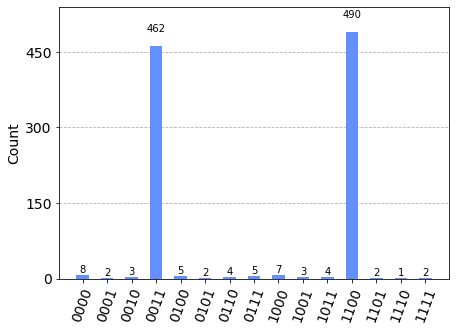

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result=simulator.run(qc.decompose(),shots=1000).result()
counts = result.get_counts()
print("\nTotal count are:",counts)
plot_histogram(counts)

Two marked state results  after two iterations are indicated in the histogram: The two solutions  correspond to  the path descriptor $|1100 \rangle$  and the symmetric path descriptor $|0011 \rangle$.